1. Run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables, using sites from the Douro and Tejo basins.

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()

In [4]:
#enviromental variables
# "Altitude", 
# "Actual_river_slope"
# "Elevation_mean_catch" 
# "prec_ann_catch"
# "temp_ann"
# "temp_jan"
# "temp_jul"

In [3]:
dftejodouro = df[(df['Catchment_name']=='Douro') | (df['Catchment_name']=='Tejo')]
dftejodouro

Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
18    ES_03_0001  41.957268  -2.926857     Spain          Douro       0   
19    ES_03_0002  41.850818  -2.591150     Spain          Douro       0   
28    ES_03_0012  41.498026  -5.528753     Spain          Douro       0   
32    ES_03_0016  41.586853  -3.072064     Spain          Douro       0   
43    ES_03_0029  41.830177  -3.782420     Spain          Douro       0   
...          ...        ...        ...       ...            ...     ...   
4947     PTTA264  39.477852  -8.002427  Portugal           Tejo       0   
4948     PTTA265  39.477021  -8.106303  Portugal           Tejo       0   
4949     PTTA266  39.475082  -8.334351  Portugal           Tejo       0   
4950     PTTA267  39.453694  -8.432669  Portugal           Tejo       0   
4951     PTTA268  39.358698  -8.490446  Portugal           Tejo       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
18            1                1              1             1  ...   
19            1                0              1             0  ...   
28            1                0              1             0  ...   
32            1                0              1             0  ...   
43            1                0              1             0  ...   
...         ...              ...            ...           ...  ...   
4947          1                0              0             0  ...   
4948          1                0              0             0  ...   
4949          1                0              1             0  ...   
4950          1                0              1             0  ...   
4951          1                0              1             0  ...   

      Squalius malacitanus  Squalius pyrenaicus  Squalius torgalensis  \
18                       0                    0                     0   
19                       0                    0                     0   
28                       0                    0                     0   
32                       0                    0                     0   
43                       0                    0                     0   
...                    ...                  ...                   ...   
4947                     0                    0                     0   
4948                     0                    1                     0   
4949                     0                    0                     0   
4950                     0                    0                     0   
4951                     0                    1                     0   

      Thymallus thymallus  Tinca tinca Zingel asper Squalius sp  Barbatula sp  \
18                      0            0            0           1             0   
19                      0            0            0           1             0   
28                      0            0            0           1             0   
32                      0            0            0           1             0   
43                      0            0            0           1             0   
...                   ...          ...          ...         ...           ...   
4947                    0            0            0           0             0   
4948                    0            0            0           1             0   
4949                    0            0            0           0             0   
4950                    0            0            0           0             0   
4951                    0            0            0           1             0   

     Phoxinus sp  Iberochondrostoma_sp  
18             0                     0  
19             0                     0  
28             0                     0  
32             0                     0  
43             0                     0  
...          ...                   ...  
4947           0                     0  
4948           0                     0  
4949           0                     0  
4950 

In [5]:
dfenviroment = dftejodouro[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]
dfenviroment

Altitude  Actual_river_slope  Elevation_mean_catch  prec_ann_catch  \
18        1179               0.001           1687.103217      810.092422   
19        1038               2.258           1293.238318      650.030528   
28         636               0.263            967.398405      513.949149   
32         890               2.909           1088.329483      553.756064   
43         872               3.530            985.273741      518.863081   
...        ...                 ...                   ...             ...   
4947        38               0.100            704.675069      515.039678   
4948        26               0.100            702.673201      516.097287   
4949        20               0.100            697.730192      518.386401   
4950        13               0.100            679.784324      556.028518   
4951        13               0.100            678.426582      556.481186   

      temp_ann  temp_jan  temp_jul  
18         9.3       1.4      18.4  
19        10.4       2.2      19.6  
28        12.6       3.8      21.3  
32        11.2       2.7      20.5  
43        11.1       2.6      20.0  
...        ...       ...       ...  
4947      17.1      10.3      23.8  
4948      17.1      10.4      23.6  
4949      16.7      10.8      22.9  
4950      16.7      10.9      22.7  
4951      16.8      11.0      22.6  

[507 rows x 7 columns]

2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

Text(0, 0.5, 'Distance')

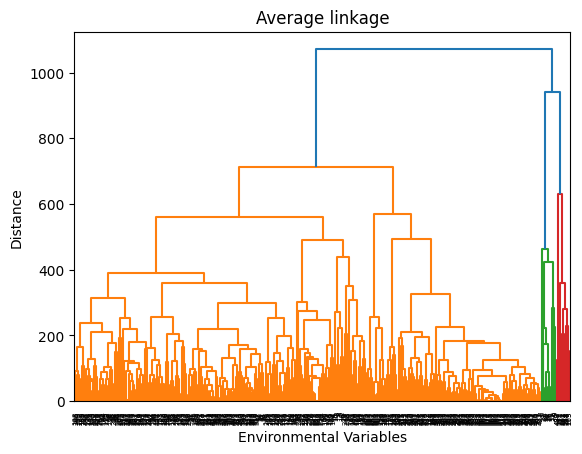

In [10]:
dendrogram_plot = dendrogram(linkage(dfenviroment, method='average'))
plt.title('Average linkage' )
plt.xlabel('Environmental Variables')
plt.ylabel('Distance')

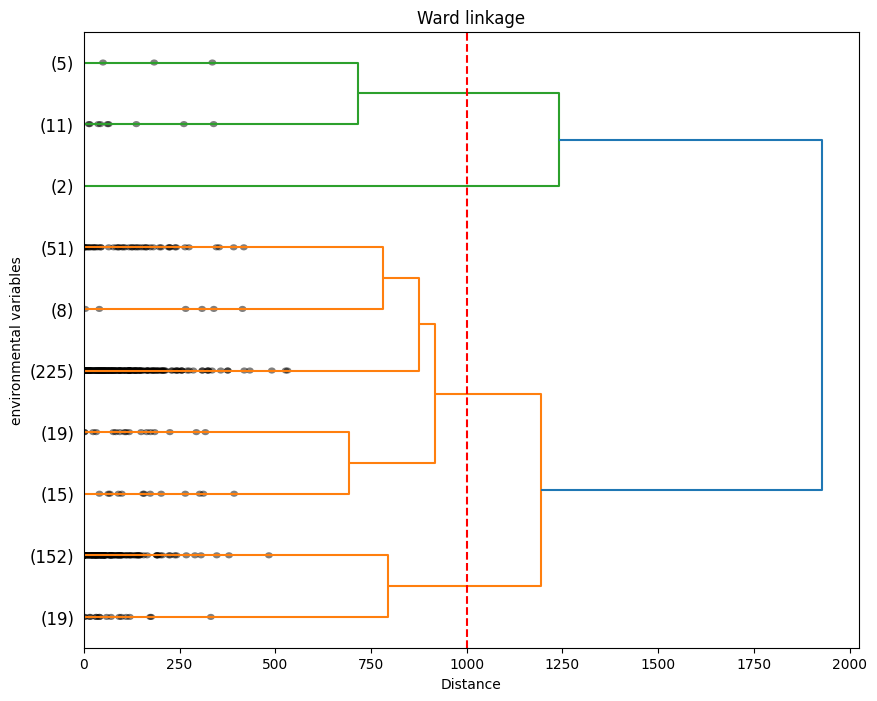

In [11]:
# run linkage
linkclust = linkage(dfenviroment, 
                   metric = 'cityblock', # cityblock or Manhattan dissimilarity for the dissimilarity matrix
                   method='average') # you may compare with other methods except 'centroid' and 'ward' which will only run only with euclidean distances.

# run dendrogram
plt.figure(figsize=(10, 8))
dendrogram_plot = dendrogram(linkclust, 
                            truncate_mode='lastp',  # show only the last p merged clusters - important when there are too many objects
                            p=10,  # p merged clusters to show 
                            leaf_font_size=12.,
                            show_contracted=True,  # to get a distribution impression in truncated branches
                            orientation='right') # orientation 90º right
plt.title('Ward linkage' )
plt.xlabel('Distance')
plt.ylabel('environmental variables')

# set the number and cluster composition by considering a maximum distance of 8 by drawing a vertical line (x=8)
plt.axvline(x=1000, color='r', linestyle='--')

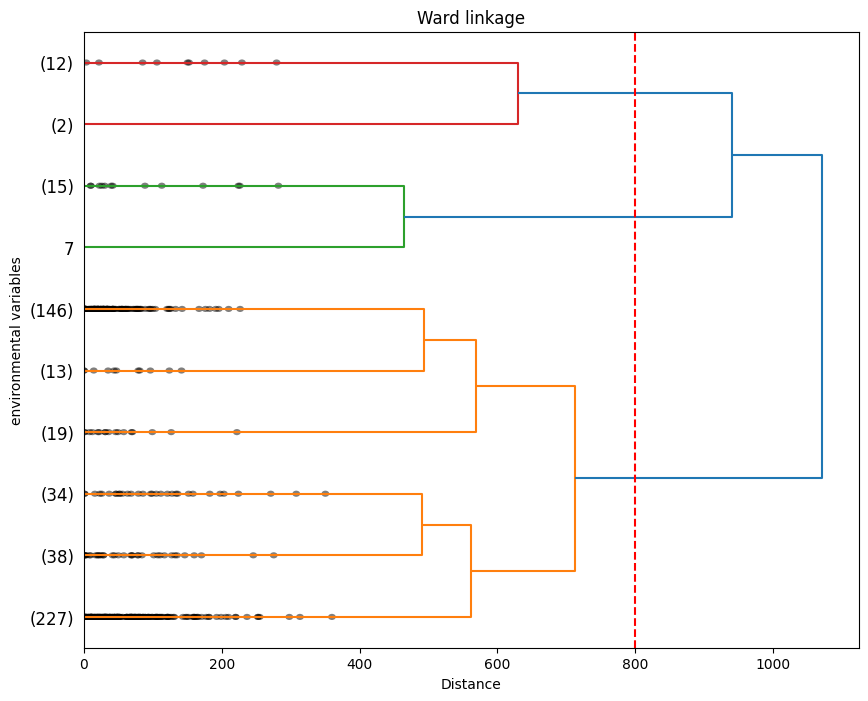

In [12]:
# run linkage
linkclust = linkage(dfenviroment, 
                   metric = 'euclidean', # Euclidean distance for the dissimilarity matrix
                   method='average') # you may compare with other methods except 'centroid' and 'ward' which will only run only with euclidean distances.

# run dendrogram
plt.figure(figsize=(10, 8))
dendrogram_plot = dendrogram(linkclust, 
                            truncate_mode='lastp',  # show only the last p merged clusters - important when there are too many objects
                            p=10,  # p merged clusters to show 
                            leaf_font_size=12.,
                            show_contracted=True,  # to get a distribution impression in truncated branches
                            orientation='right') # orientation 90º right
plt.title('Ward linkage' )
plt.xlabel('Distance')
plt.ylabel('environmental variables')

# set the number and cluster composition by considering a maximum distance of 8 by drawing a vertical line (x=8)
plt.axvline(x=800, color='r', linestyle='--')

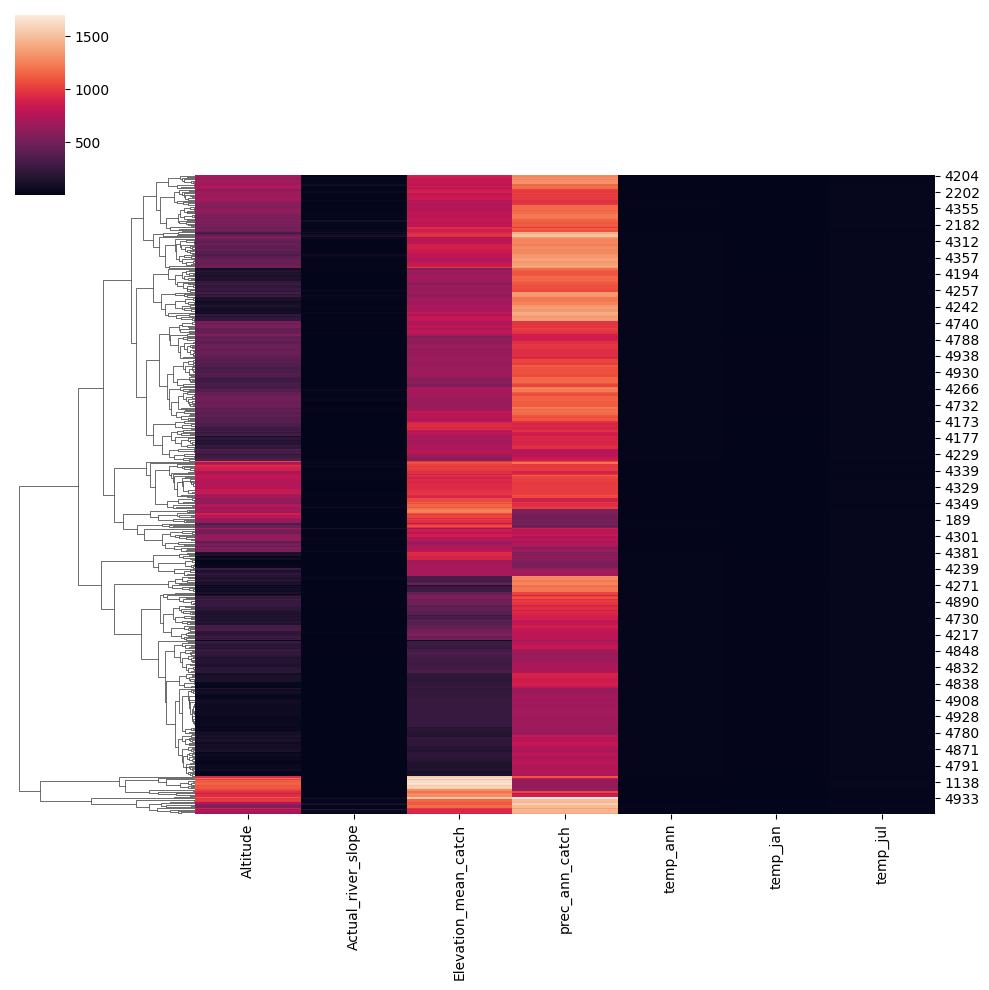

In [13]:
#Heatmap
sns.clustermap(dfenviroment, col_cluster=False, row_cluster=True, method='average')

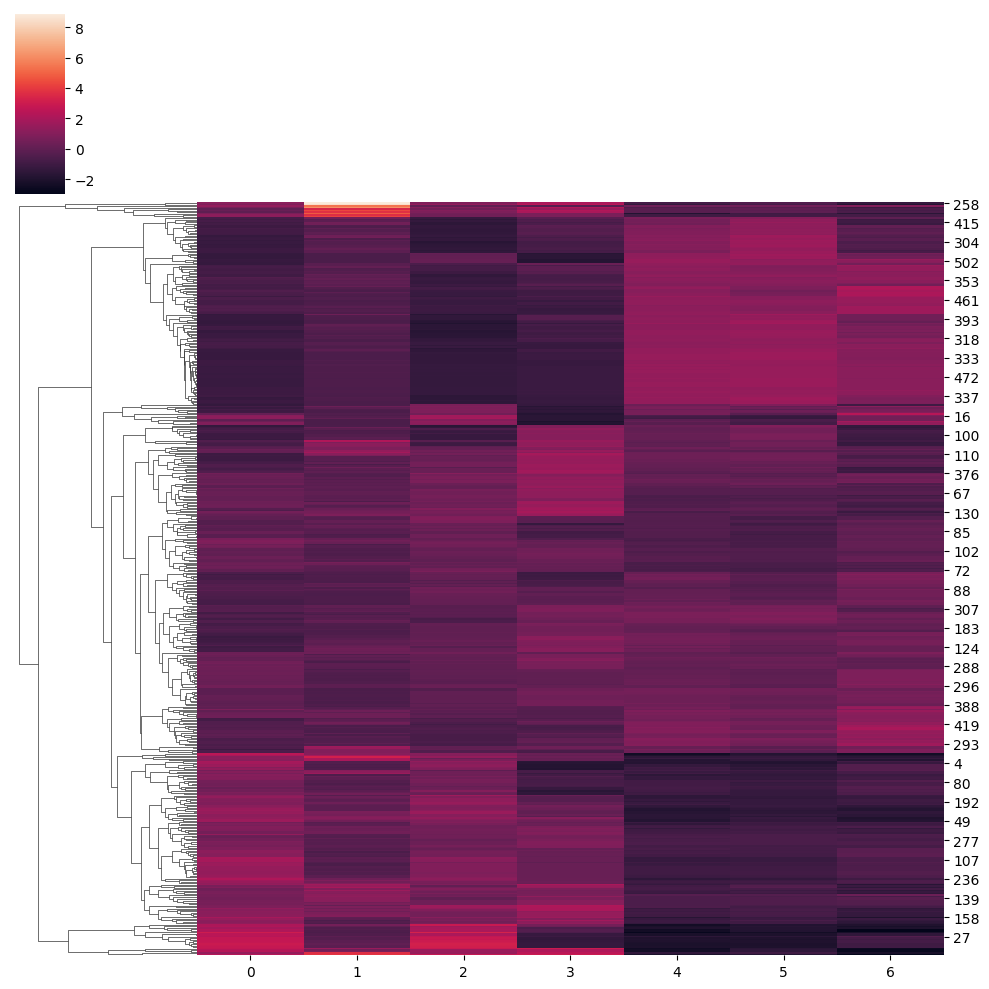

In [15]:
df_clust_scaled = StandardScaler().fit_transform(dfenviroment)
sns.clustermap(df_clust_scaled, col_cluster=False, row_cluster=True, method='average')

